<center>
    <img src="https://images.unsplash.com/photo-1519638399535-1b036603ac77?w=600&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8YW5pbWV8ZW58MHwwfDB8fHwy" width="600" height="200" alt="cognitiveclass.ai logo">
</center>

# Top Anime 2024 Analyzing

## Objectives

After completing this lab you will be able to:

*   **Data Cleaning**
    - Handle Missing Values
    - Handle Duplicated
    - Remove Outliers

*   **Data Visualization**
    - Create Plots: Generate visualizations to explore and understand different variables in the dataset effectively.
    - Word Cloud for Text Visualization: Utilize word clouds to visually represent textual data and highlight key terms or patterns.

*   **Model Developemnt**
    - Develop Prediction Models: Build predictive models to analyze and forecast target variables based on input features.
    - Test Predictions: Evaluate the performance of prediction models using appropriate metrics and validation techniques.


## **Table of Contents**

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Data Cleaning](#0)<br>
2.  [EDA](#1)<br>
3.  [Data Visualization](#3) <br>
4.  [Model Development](#4) <br>
5.  [References](#5) <br>

</div>


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
# Import Data
try:
    df = pd.read_csv("Data/Top_Anime_data.csv")
except Exception as e:
    print(f"Error import Data str{e}")
df.head(1)


,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older


## **Data Wrangling: <a id="0"></a>**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

**Handle Missing values:**


In [4]:
df.isnull().sum()

Score            0
Popularity       0
Rank             0
Members          0
Description      0
Synonyms       291
Japanese         1
English        141
Type             0
Episodes         0
Status           0
Aired            0
Premiered      431
Broadcast      431
Producers        0
Licensors        0
Studios          0
Source           0
Genres         229
Demographic    479
Duration         0
Rating           0
dtype: int64

- **Synonyms, Japanese, English, Premiered, Broadcast, Genres, Demographic:** For these columns with a significant number of null values, removing or replacing them might not be the best option.
- **Premiered, Broadcast, Demographic:** These columns are not important for my analysis, so considering them as unnecessary columns and just dropping them will be a `good` option.

In [5]:
# Remove unnecessary columns:
df = df.drop(columns=['Premiered', 'Broadcast', 'Demographic'])

In [6]:
columns = df.columns
for column in columns:
    print(f"{column}: {df[column].nunique()}")

Score: 121
Popularity: 1000
Rank: 1000
Members: 481
Description: 999
Synonyms: 701
Japanese: 953
English: 856
Type: 6
Episodes: 84
Status: 2
Aired: 961
Producers: 641
Licensors: 90
Studios: 166
Source: 15
Genres: 237
Duration: 141
Rating: 5


## **EDA:<a id="1"></a>**

**Detect & Remove Outliers:**

In [7]:
df.describe()

,Score,Popularity,Rank,Members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.156580,1805.637000,500.500000,223.648000
std,0.284344,1888.308553,288.819436,246.288299
min,7.800000,1.000000,1.000000,1.000000
25%,7.920000,413.750000,250.750000,31.750000
50%,8.100000,1139.500000,500.500000,132.000000
75%,8.312500,2633.750000,750.250000,330.000000
max,9.380000,12043.000000,1000.000000,998.000000


<Axes: >

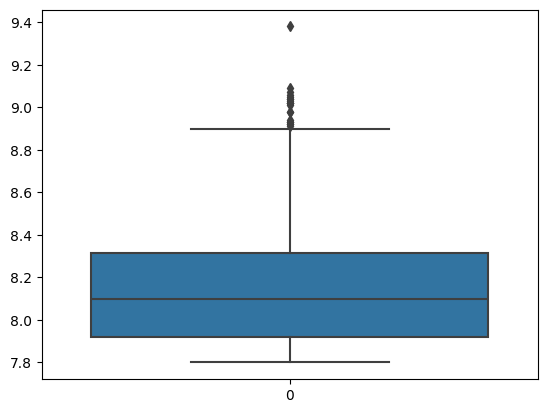

In [8]:
sns.boxplot(df['Score'])

<Axes: >

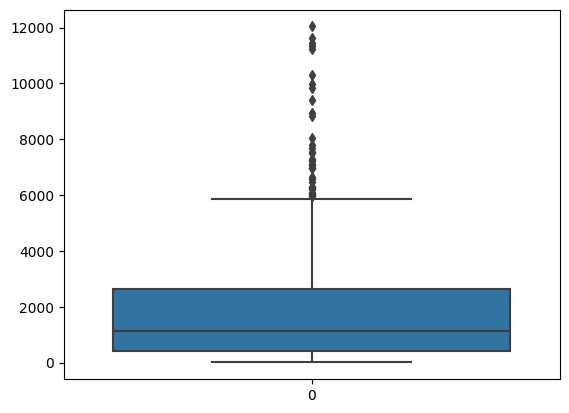

In [9]:
sns.boxplot(df['Popularity'])

<Axes: >

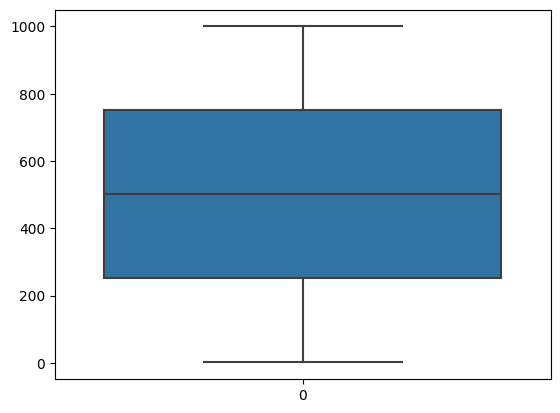

In [9]:
sns.boxplot(df['Rank'])

<Axes: >

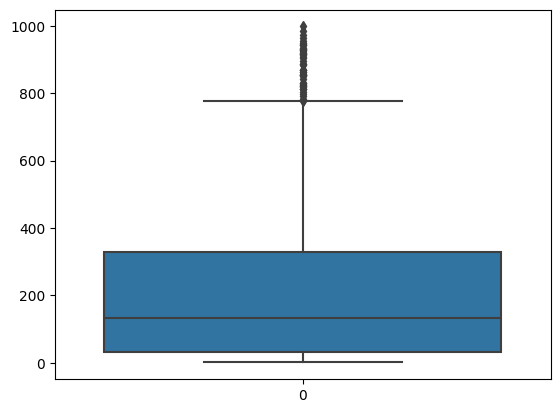

In [10]:
sns.boxplot(df['Members'])

- No outliers has been detected with Rank variable.
- Let's remove outliers from the other variables.

**Remove Outliers:**

In [10]:
df.describe()

,Score,Popularity,Rank,Members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.156580,1805.637000,500.500000,223.648000
std,0.284344,1888.308553,288.819436,246.288299
min,7.800000,1.000000,1.000000,1.000000
25%,7.920000,413.750000,250.750000,31.750000
50%,8.100000,1139.500000,500.500000,132.000000
75%,8.312500,2633.750000,750.250000,330.000000
max,9.380000,12043.000000,1000.000000,998.000000


- For `Score` the data seems to be normally distributed, with a relatively small devition of std compared to the mean, so I will use the z-score method for removing its outliers.
- For `Popularity` & `Members` the data seems to be skewed as indicated by the large difference between the mean and the median, & also for the std that's relatively large compared to the mean; Therefore, the IQR method may be suitable for outlier detection in these 2 variables.

In [11]:
# Score - using Z-score method

df['z-score'] = (df['Score'] - df['Score'].mean())/df['Score'].std()
'''
with 2:
    Upper Bound: 8.156580 + (2 * 0.284344) = 8.725268
    Lower Bound: 8.156580 - (2 * 0.284344) = 7.587892
with 3:
    Upper Bound: 8.156580 + (3 * 0.284344) = 8.725580
    Lower Bound: 8.156580 - (3 * 0.284344) = 7.587580
'''

'\nwith 2:\n    Upper Bound: 8.156580 + (2 * 0.284344) = 8.725268\n    Lower Bound: 8.156580 - (2 * 0.284344) = 7.587892\nwith 3:\n    Upper Bound: 8.156580 + (3 * 0.284344) = 8.725580\n    Lower Bound: 8.156580 - (3 * 0.284344) = 7.587580\n'

C:\Users\oo\AppData\Local\Temp\ipykernel_3620\3534520355.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Score'], shade=True)
c:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Score', ylabel='Density'>

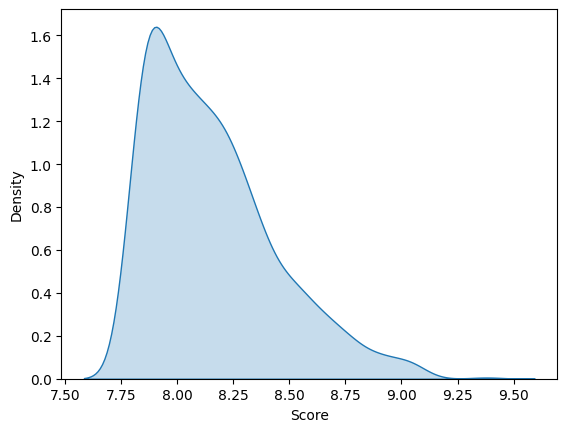

In [31]:
sns.kdeplot(df['Score'], shade=True)

Majority of data is in the range, so I will choose 2 for z-score method

In [12]:
outliers = df[(df['z-score'] > 2) | (df['z-score']<-2)]

In [13]:
cleaned_outliers_df = df.drop(outliers.index)
print("Original DataFrame's shape:")
print(df.shape)
print("\nDataFrame after removing outliers shape:")
print(cleaned_outliers_df.shape)

Original DataFrame's shape:
(1000, 20)

DataFrame after removing outliers shape:
(950, 20)


C:\Users\oo\AppData\Local\Temp\ipykernel_15052\317444598.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Popularity'], shade=True)
c:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Popularity', ylabel='Density'>

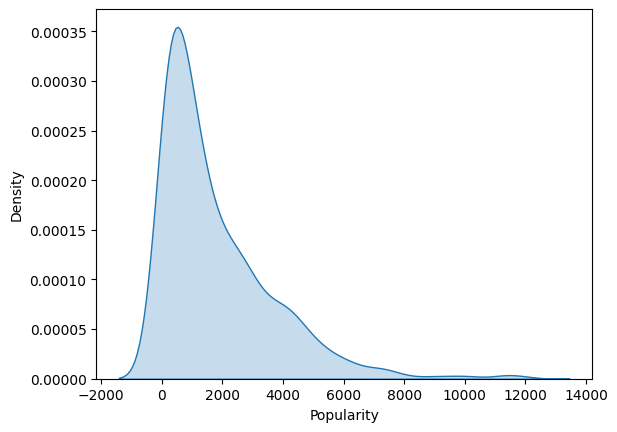

In [14]:
# Popularity - using IQR method
sns.kdeplot(df['Popularity'], shade=True)

C:\Users\oo\AppData\Local\Temp\ipykernel_27052\2976297411.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Members'], shade=True)
c:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Members', ylabel='Density'>

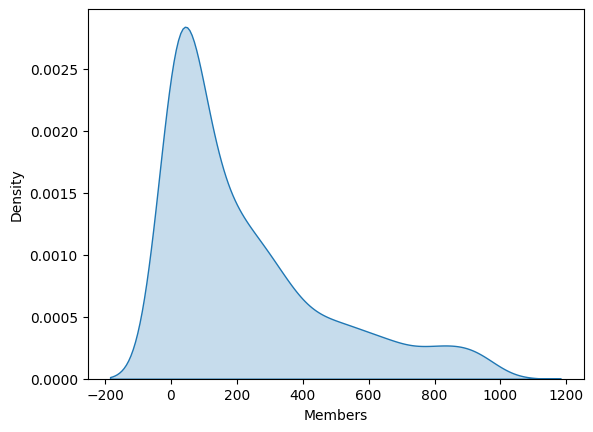

In [23]:
# Popularity - using IQR method
sns.kdeplot(df['Members'], shade=True)

In [15]:
Q1 = cleaned_outliers_df['Popularity'].quantile(0.25)
Q3 = cleaned_outliers_df['Popularity'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cleaned_outliers_df[(cleaned_outliers_df['Popularity'] < lower_bound) | (cleaned_outliers_df['Popularity'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

cleaned_outliers_dff = cleaned_outliers_df.drop(outliers.index)

print("Popularity: ")
print("Original DataFrame's shape:")
print(cleaned_outliers_df.shape)
print("\nDataFrame after removing outliers shape:")
print(cleaned_outliers_dff.shape)
#==================#
Q1 = cleaned_outliers_dff['Members'].quantile(0.25)
Q3 = cleaned_outliers_dff['Members'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cleaned_outliers_dff[(cleaned_outliers_dff['Members'] < lower_bound) | (cleaned_outliers_dff['Members'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

cleaned_outliers_dfff = cleaned_outliers_dff.drop(outliers.index)

print("Members: ")
print("Original DataFrame's shape:")
print(cleaned_outliers_dff.shape)
print("\nDataFrame after removing outliers shape:")
print(cleaned_outliers_dfff.shape)


Lower Bound: -2935.125
Upper Bound: 6099.875
Popularity: 
Original DataFrame's shape:
(950, 20)

DataFrame after removing outliers shape:
(918, 20)
Lower Bound: -397.625
Upper Bound: 769.375
Members: 
Original DataFrame's shape:
(918, 20)

DataFrame after removing outliers shape:
(863, 20)


In [16]:
dff = cleaned_outliers_dfff

<Axes: xlabel='Score'>

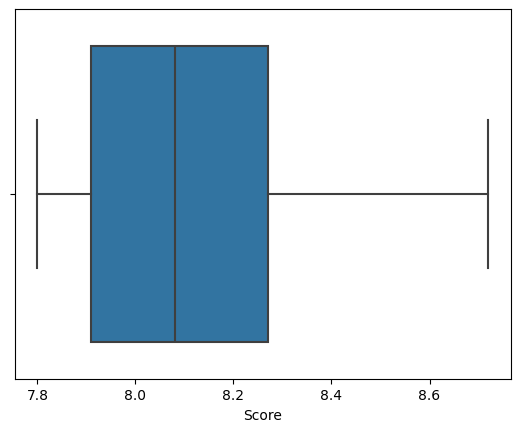

In [17]:
sns.boxplot(x=dff['Score'])

<Axes: xlabel='Popularity'>

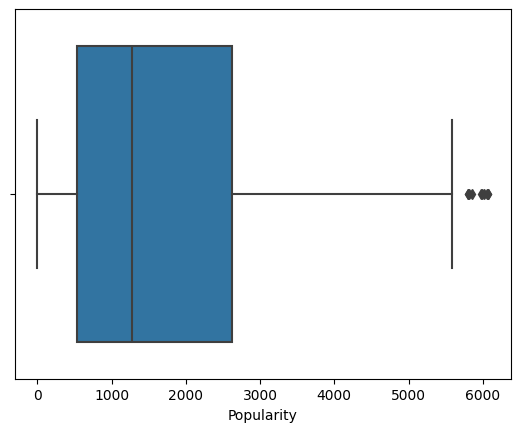

In [18]:
sns.boxplot(x=dff['Popularity'])

<Axes: xlabel='Members'>

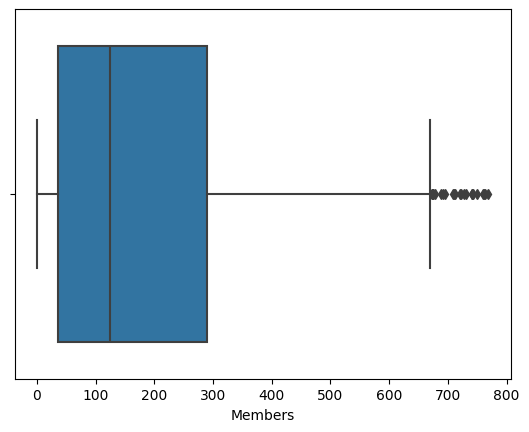

In [19]:
sns.boxplot(x=dff['Members'])

**Correlations:**

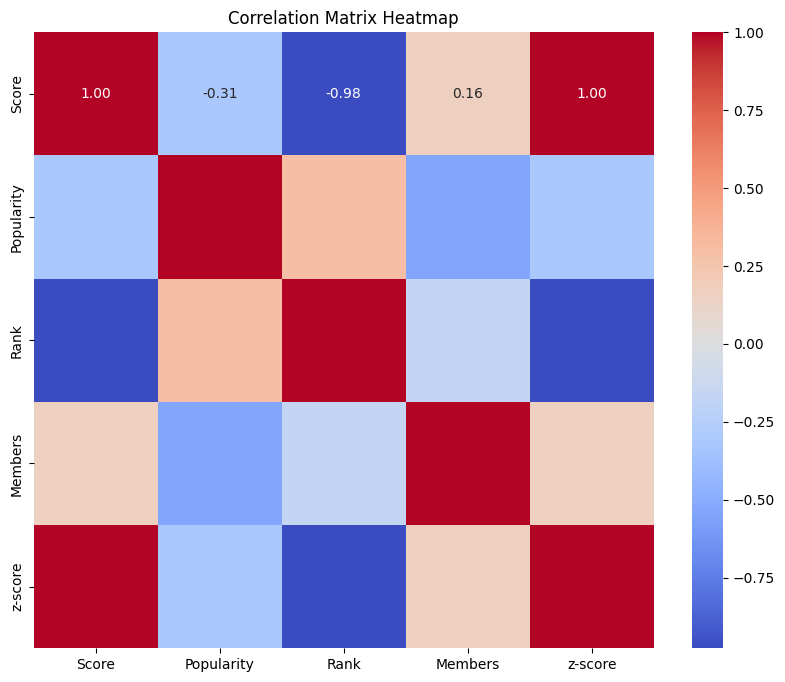

In [29]:
numeric_df = dff.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='Rank', ylabel='Score'>

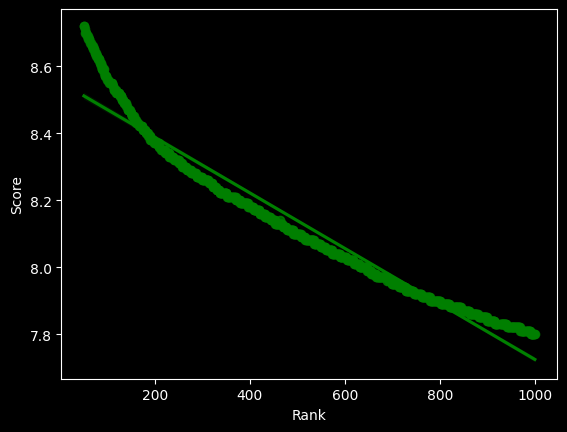

In [50]:
sns.regplot(x = "Rank", y="Score", color='green', data = numeric_df)

## **Data Visualization:<a id="2"></a>**

In [36]:
plt.style.use('dark_background')

In [37]:
dff.head(2)

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,Status,Aired,Producers,Licensors,Studios,Source,Genres,Duration,Rating,z-score
50,8.72,19,51,2,Barely surviving in a barrel after passing thr...,OP,ONE PIECE,One Piece,TV,Unknown,Currently Airing,"Oct 20, 1999 to ?","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,Manga,"ActionAction, AdventureAdventure, FantasyFantasy",24 min.,PG-13 - Teens 13 or older,1.981473
51,8.72,1274,52,187,Even after having risen to the utmost rank of ...,"Shouwa Genroku Rakugo Shinjuu 2nd Season, Show...",昭和元禄落語心中～助六再び篇～,Descending Stories: Showa Genroku Rakugo Shinju,TV,12,Finished Airing,"Jan 7, 2017 to Mar 25, 2017","Mainichi Broadcasting System, Kodansha, DAX Pr...","None found, add some",Studio Deen,Manga,NaN,24 min. per ep.,PG-13 - Teens 13 or older,1.981473


**Top 10 Animes Ranked by Score**

In [38]:
top_10_animes = dff.sort_values(by='Score', ascending=False).head(10)

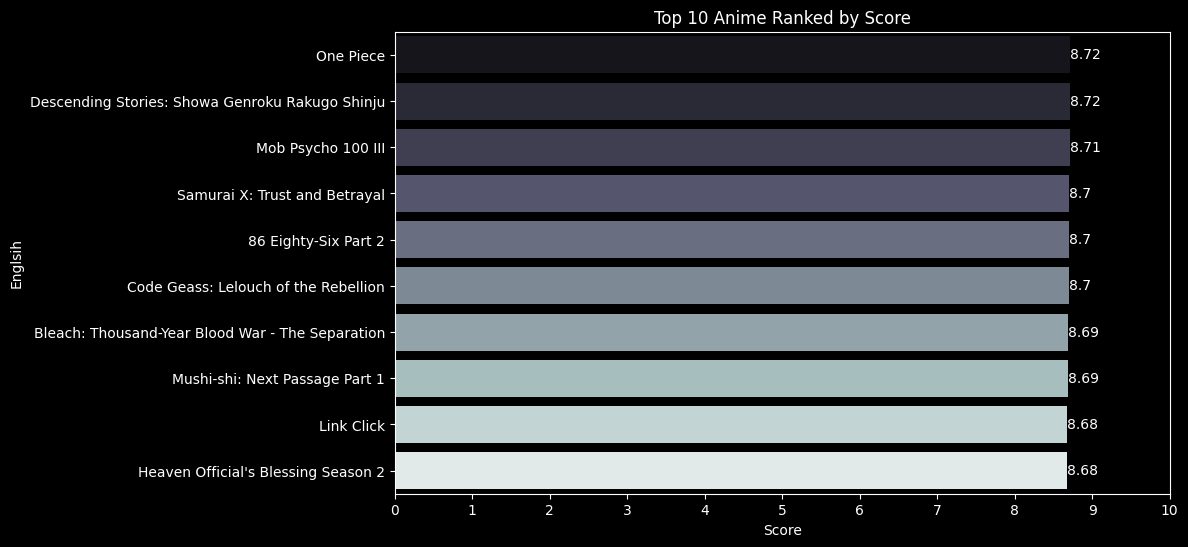

In [39]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Score', y='English', data=top_10_animes, palette='bone')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Score')
plt.xticks(range(11))
plt.ylabel('Englsih')
plt.title('Top 10 Anime Ranked by Score')
plt.show()

**Top 10 Animes by their Popularity:**

In [40]:
top_10_animes_pop = dff.sort_values(by='Popularity', ascending=False).head(10)

In [41]:
# Let's check if we have null values in columns we need for plotting
top_10_animes_pop['English'].isnull().sum()

5

*We have null values in English columns, as we need it for plotting so we must deal with it first!*

In [42]:
top_10_animes_pop = top_10_animes_pop.dropna(subset=['English'])
top_10_animes_pop['English'].isnull().sum()

0

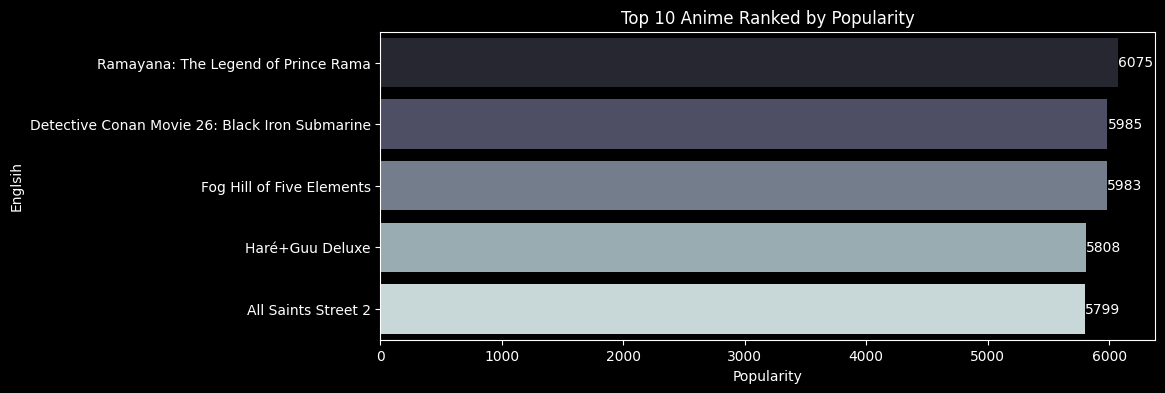

In [43]:
plt.figure(figsize=(10, 4))

ax = sns.barplot(x='Popularity', y='English', data=top_10_animes_pop, palette='bone')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Popularity')
# plt.xticks(range())
plt.ylabel('Englsih')
plt.title('Top 10 Anime Ranked by Popularity')
plt.show()

**Conunt of Animes with respect to their Rating:**

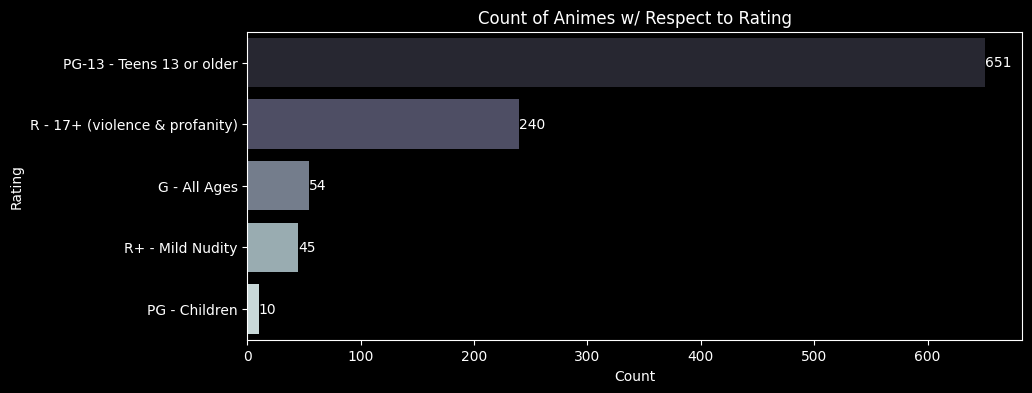

In [44]:
plt.figure(figsize=(10, 4))

ax = sns.countplot(y='Rating', data=df, palette='bone', orient='h', order=df['Rating'].value_counts().index)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Count of Animes w/ Respect to Rating')
plt.show()


Studio - Genres

In [45]:
print(dff['Genres'].isnull().sum())
print(dff['Studios'].isnull().sum())

204
0


In [46]:
dff = dff.dropna(subset=['Genres'])

In [47]:
studios_by_sources_exploded = dff.groupby(by='Studios')['Source'].unique().reset_index()
studios_by_sources_exploded = studios_by_sources_exploded.explode('Source').reset_index(drop=True)
print(studios_by_sources_exploded)


          Studios        Source
0            8bit         Manga
1    A-1 Pictures   Light novel
2    A-1 Pictures         Manga
3    A-1 Pictures     Web manga
4    A-1 Pictures      Original
..            ...           ...
210         feel.   Light novel
211         feel.         Manga
212      ufotable  Visual novel
213      ufotable         Manga
214      ufotable   Light novel

[215 rows x 2 columns]


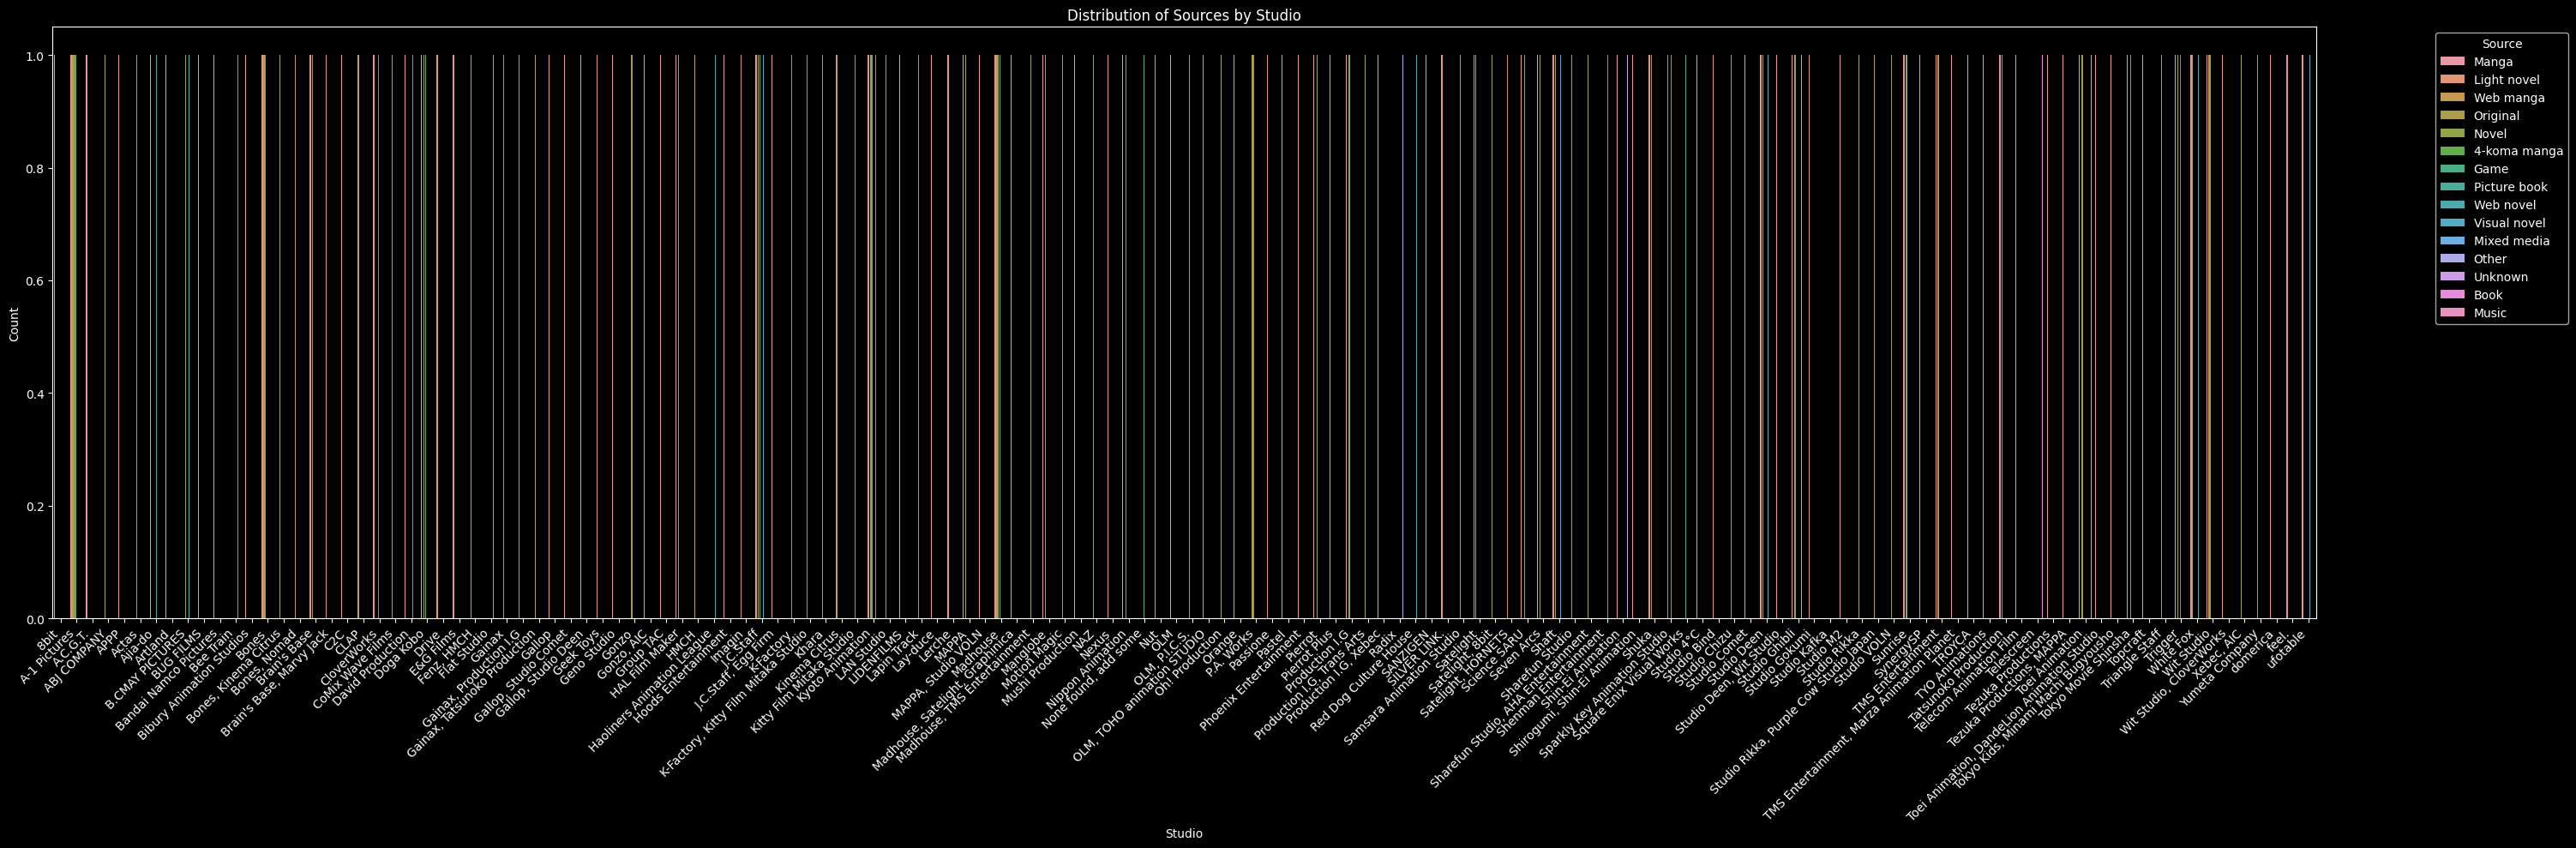

In [87]:
plt.figure(figsize=(30, 10))
sns.countplot(data=studios_by_sources_exploded, x='Studios', hue='Source')
plt.title('Distribution of Sources by Studio')
plt.xlabel('Studio')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
dff.head(1)

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,Status,Aired,Producers,Licensors,Studios,Source,Genres,Duration,Rating,z-score
50,8.72,19,51,2,Barely surviving in a barrel after passing thr...,OP,ONE PIECE,One Piece,TV,Unknown,Currently Airing,"Oct 20, 1999 to ?","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,Manga,"ActionAction, AdventureAdventure, FantasyFantasy",24 min.,PG-13 - Teens 13 or older,1.981473


**Text Visualization:**

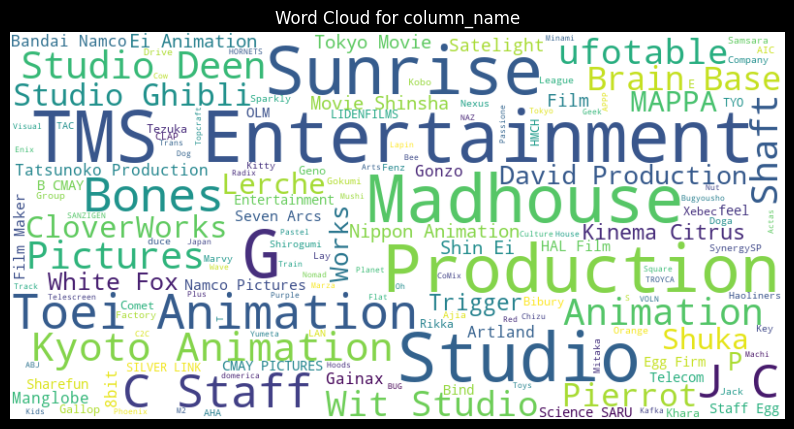

In [49]:
from wordcloud import WordCloud


text = ' '.join(dff['Studios'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud for {}'.format('column_name'))
plt.show()


## **Model Development:<a id="3"></a>**

In [61]:
numeric_df.head(10)

,Score,Popularity,Rank,Members,z-score
50,8.72,19,51,2,1.981473
51,8.72,1274,52,187,1.981473
52,8.71,301,53,673,1.946304
53,8.70,877,54,276,1.911135
54,8.70,447,55,497,1.911135
55,8.70,22,56,2,1.911135
56,8.69,907,57,267,1.875967
58,8.69,803,59,300,1.875967
59,8.68,646,60,364,1.840798
60,8.68,3373,61,43,1.840798


### *Fit linear regression model to predict Rank using Score attribute*

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [63]:
#using fit() from 
x = df[['Rank']] #prediction
y = df[['Score']] #the target 
LR = LinearRegression() 
LR.fit(x, y)

LinearRegression()

In [64]:
LR.score(x, y) #R² of the model

0.8984079874575969

As we can see about 89.8% of the variability in the dependent variable can be predicted or explained by the independent variable(s) using the linear regression model.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_pred = LR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.005912883023861737


*The model's predictions are close to the actual values*

**Improve performance:**

In [67]:
#Create list of tuples:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
x = df[['Rank']]
y = df[['Score']]
pipe.fit(x, y) #fit prediction and target

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [70]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(X_train, y_train)
#use it for prediction
prediction = RidgeModel.predict(X_test)


In [71]:
r2_score(y_test, prediction)

0.916144587602033

R-squared (R2) score of 0.916 indicates that the model explains approximately 91.6% of the variance in the target variable ("Score") based on the features used for prediction!

## **References:<a id="5"></a>**

1. Top Anime 24 Dataset: [Link to Dataset](https://www.kaggle.com/datasets/bhavyadhingra00020/top-anime-dataset-2024)
2. Dosatsu Sozo Project: [Link to Project Website](https://github.com/AbdessamadTzn/Dosatsu-Sozo)

## By: **[Abdessmad Touzani](https://www.linkedin.com/in/abdessamadtouzani/)**